<u><h1 align="center"> Projeto de instalções industriais</h1>

# Introdução:

A principal finalidade de um projeto de instalações industriais é garantir que a planta opere de maneira segura, eficaz e econômica, cumprindo todas as regulamentações ambientais e de segurança aplicáveis. Entre os principais aspectos considerados estão:

1. **Planejamento e Layout**: Inclui a disposição dos equipamentos e máquinas de forma a otimizar o fluxo de trabalho e minimizar o tempo de transporte e a movimentação de materiais.

2. **Seleção de Equipamentos**: Envolve a escolha de maquinário que atenda às necessidades de produção com eficiência energética e que se integre bem ao processo industrial.

3. **Sistemas de Utilidades**: Projeta-se os sistemas necessários para o fornecimento contínuo de energia, água, ar comprimido, e outros insumos essenciais, bem como para o tratamento e a disposição adequados de resíduos.

4. **Automação e Controle**: Implementação de sistemas de controle e automação para melhorar a eficiência da produção e garantir a qualidade do produto final.

5. **Segurança e Ergonomia**: Assegura que o design das instalações cumpra com as normas de segurança e ergonomia, protegendo os trabalhadores de acidentes e melhorando o ambiente de trabalho.

6. **Sustentabilidade e Eficiência Energética**: Desenvolvimento de práticas que minimizem o impacto ambiental das operações industriais, incluindo a gestão eficiente dos recursos e a redução de emissões.


# <h1 align="center"><u> Análise Econômica:

# Simbologia de fluxo de caixa:

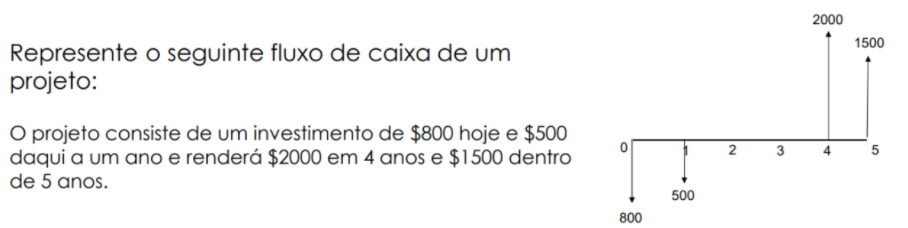

# Equações de fluxo de caixa:

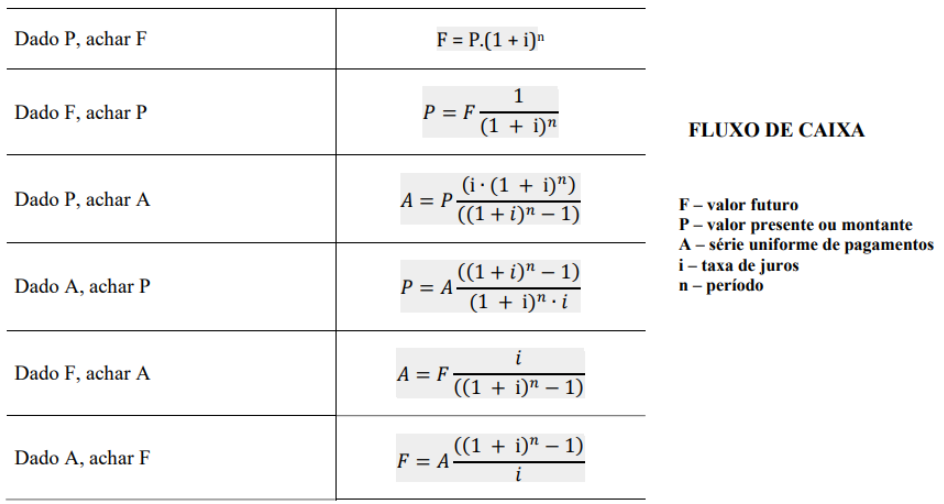

# Juros:

**Juros Simples** são uma forma de cálculo de juros onde o percentual é aplicado sempre sobre o valor inicial investido ou emprestado, durante todo o período da operação financeira. Desse modo temos: (P: principal, i: Taxa de juros; n: número de períodos de juros)

- $ J = P.i.n $

**Juros Compostos** utilizam uma abordagem onde os juros de cada período são somados ao principal para o cálculo dos juros do próximo período.

- $ J = P(1 + i)^n - P$

**Exemplo**: Supondo um emprestimo de (P=1000 R$), uma taxa de juros de (i=8% a.a) com prazo de (n=4 anos), determine o valor futuro total a ser pago, a amortização e os juros?

- Amortização = emprestimo = 1000 R$

- Juros = $ J = P(1 + i)^n - P$ = 360,49 R$

- Valor futuro = Prestação = 1360,49 R$

# Taxa minima de atratividade (TMA):

Essencialmente, a TMA é utilizada como um ponto de comparação para decidir se um investimento vale a pena, comparando-a com a taxa interna de retorno do projeto.

Para se calcular a TMA utilizam-se:

- VPL (Valor presente líquido): Trás todos os valores futuros de investimentos para o presente, supondo a taxa (i).
- VUE (Valor uniforme equivalente): Consiste em transformar o VPL em parcelas, caso maior que zero o investimento é valido.
- TIR (Taxa interna de retorno): Trás todos os valores futuros para o presente de modo a encontrar a taxa (i) que zerá o investimento, para encontrar a taxa de rendimento do projeto.
- PAYBACK: Trás os valores futuros para o presente de modo a achar o tempo (n) que o investimento se paga.



**Exemplo:**

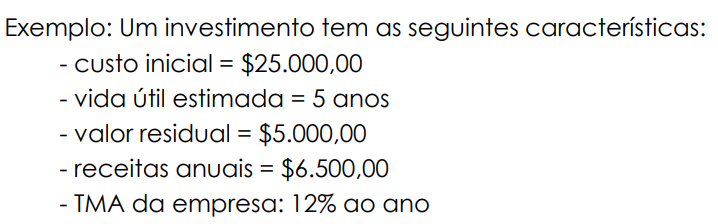

# Calculadora:

In [1]:
def P_dado_A(A, i, n):
    numerador = (1 + i) ** n - 1
    denominador = i * (1 + i) ** n
    P = A * numerador / denominador
    return P


def P_dado_F(F, i, n):
    numerador = 1
    denominador = (1 + i) ** n
    P = F * numerador / denominador
    return P


def VPL(list_of_operations):
    VPL = 0
    for operation in list_of_operations:
        if operation[0] == "A":
            VPL += P_dado_A(operation[1], operation[2], operation[3])
        elif operation[0] == "F":
            VPL += P_dado_F(operation[1], operation[2], operation[3])
        elif operation[0] == "P":
            VPL += operation[1]
    return VPL


def VUE(VPL, i, n):
    numerador = i * (1 + i) ** n
    denominador = (1 + i) ** n - 1
    VUE = VPL * numerador / denominador
    return VUE


def TIR(list_of_operations, erro=0.0001, max_iter=1000):
    i_0 = erro
    i_1 = 3 * erro

    iter_count = 0  # Contador de iterações
    while abs(i_0 - i_1) > erro:
        if iter_count >= max_iter:
            raise Exception("Newton-Raphson não convergiu após o número máximo de iterações.")  # fmt: skip
        list_0 = list(map(lambda x: (x[0], x[1], i_0, x[3]), list_of_operations.copy()))
        list_1 = list(map(lambda x: (x[0], x[1], i_1, x[3]), list_of_operations.copy()))
        vpl_0 = VPL(list_0)
        vpl_1 = VPL(list_1)
        i_0, i_1 = i_1, i_1 - vpl_0 / ((vpl_1 - vpl_0) / erro)  # fmt: skip

        iter_count += 1

    print(f"O método convergiu após {iter_count} iterações.")
    return i_1


# Exemplo
n = 5
i = 0.12
list_of_operations = [("P", -25000, 0, 0), ("A", 6500, i, n), ("F", 5000, i, n)]
vpl = VPL(list_of_operations)
vue = VUE(vpl, i, n)
tir = TIR(list_of_operations)
print(vpl)
print(vue)
print(tir)

O método convergiu após 23 iterações.
1268.1795938355394
351.805361179025
0.13875438170862248


# Depreciação e imposto de renda:

Para calcular o imposto de uma empresa devemos remover a depreciação de equipamentos dentre outros das receitas atráves das seguintes equações:

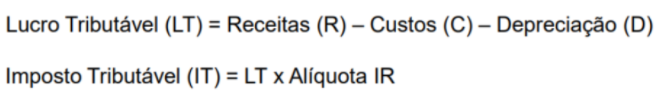

# <h1 align="center"><u> Preço de equipamentos:

# Preço do equipamento:

Para calcular o preço do equipamento ($C_P$) utilizamos: (A: principal grandeza do equipamento)

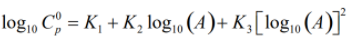

**Tabelas**:

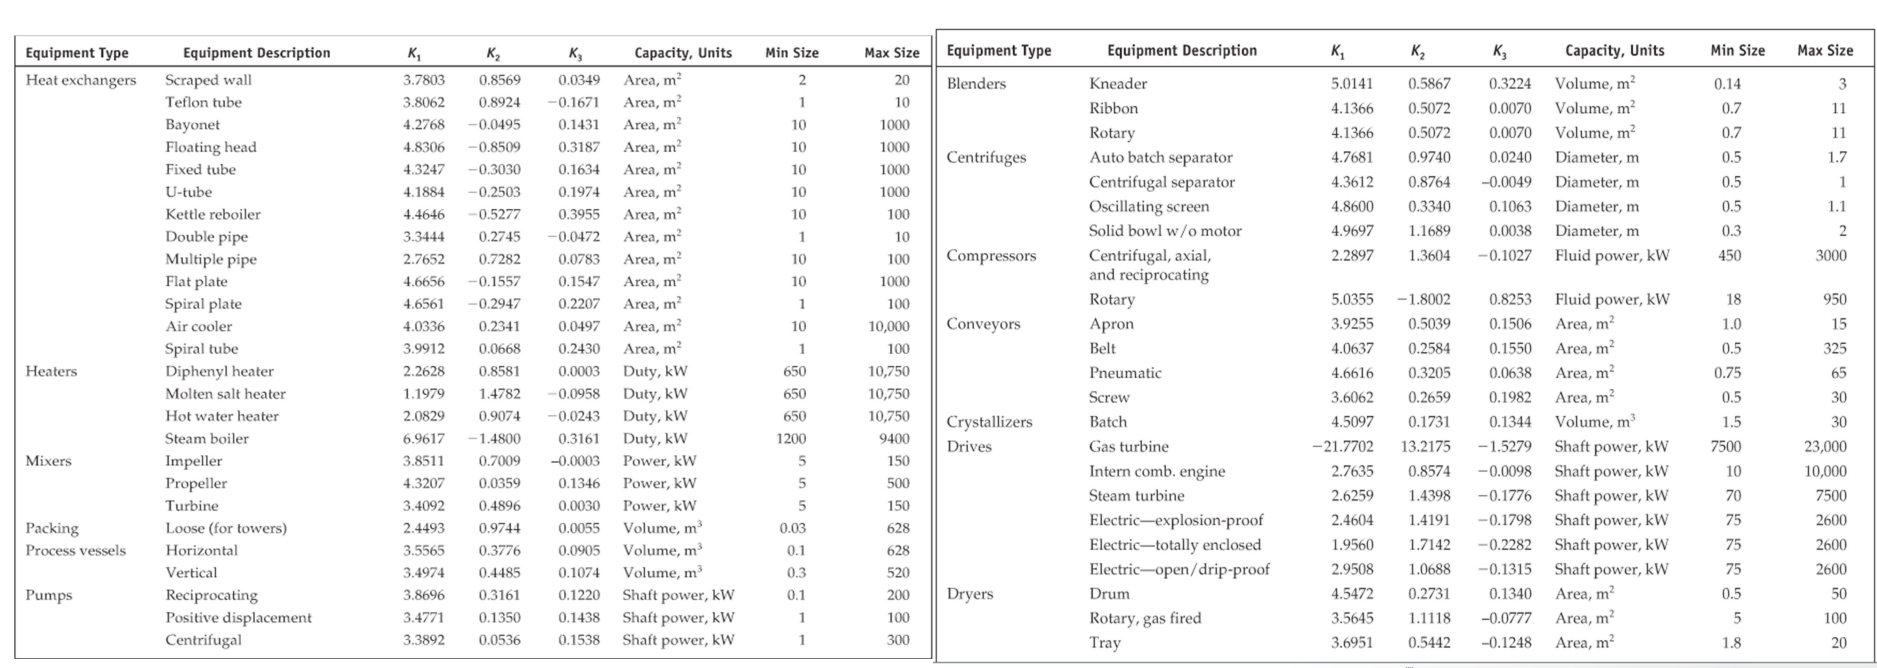

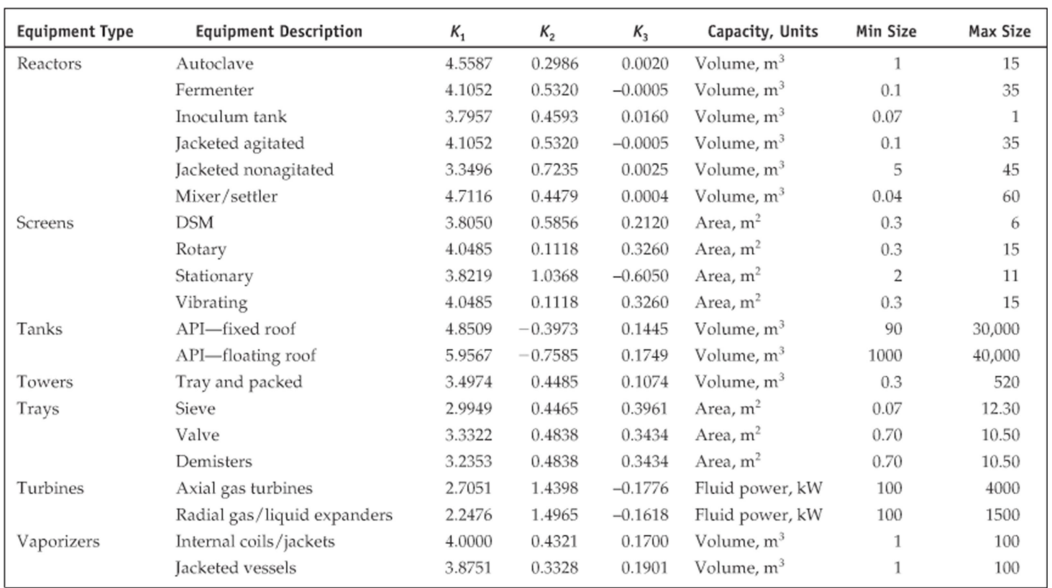

# Ajustes de pressão e material:

Para aproximarmos mais do custo verdadeiro de um equipamento é necessário fazer alguns ajustes antes, sendo eles de pressão e material, expressos por: (P: pressão manométrica (barg); $C_{BM}$: Bare module cost)

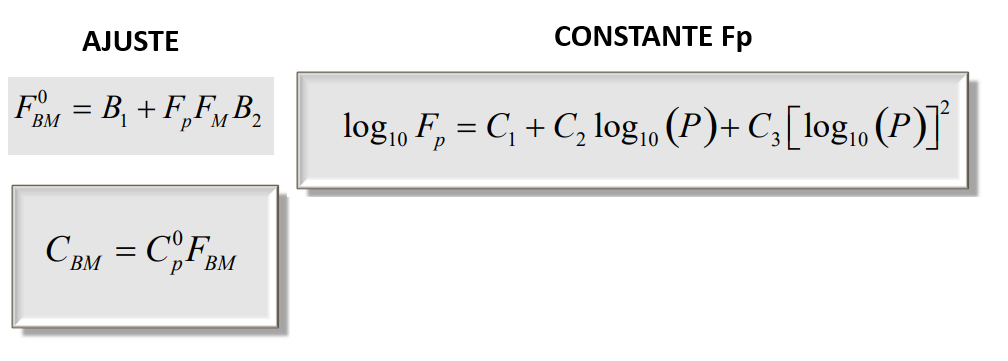

**Observação**: Para vasos a equação do fator de correção da pressão é diferente.

**Observação**: Nas condições base $F_P = F_M = 1$

In [1]:
fp = 1.023

1.74 + 1.55

3.29

**Tabelas**: (Fator $B_1, B_2$)

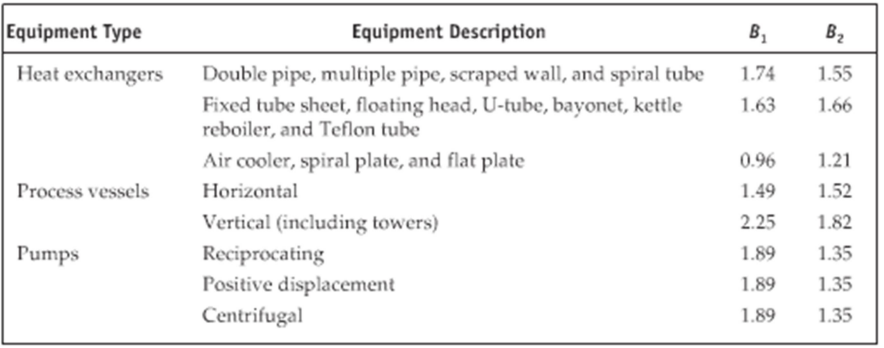

**Tabelas**: (Fator de correção de pressão)

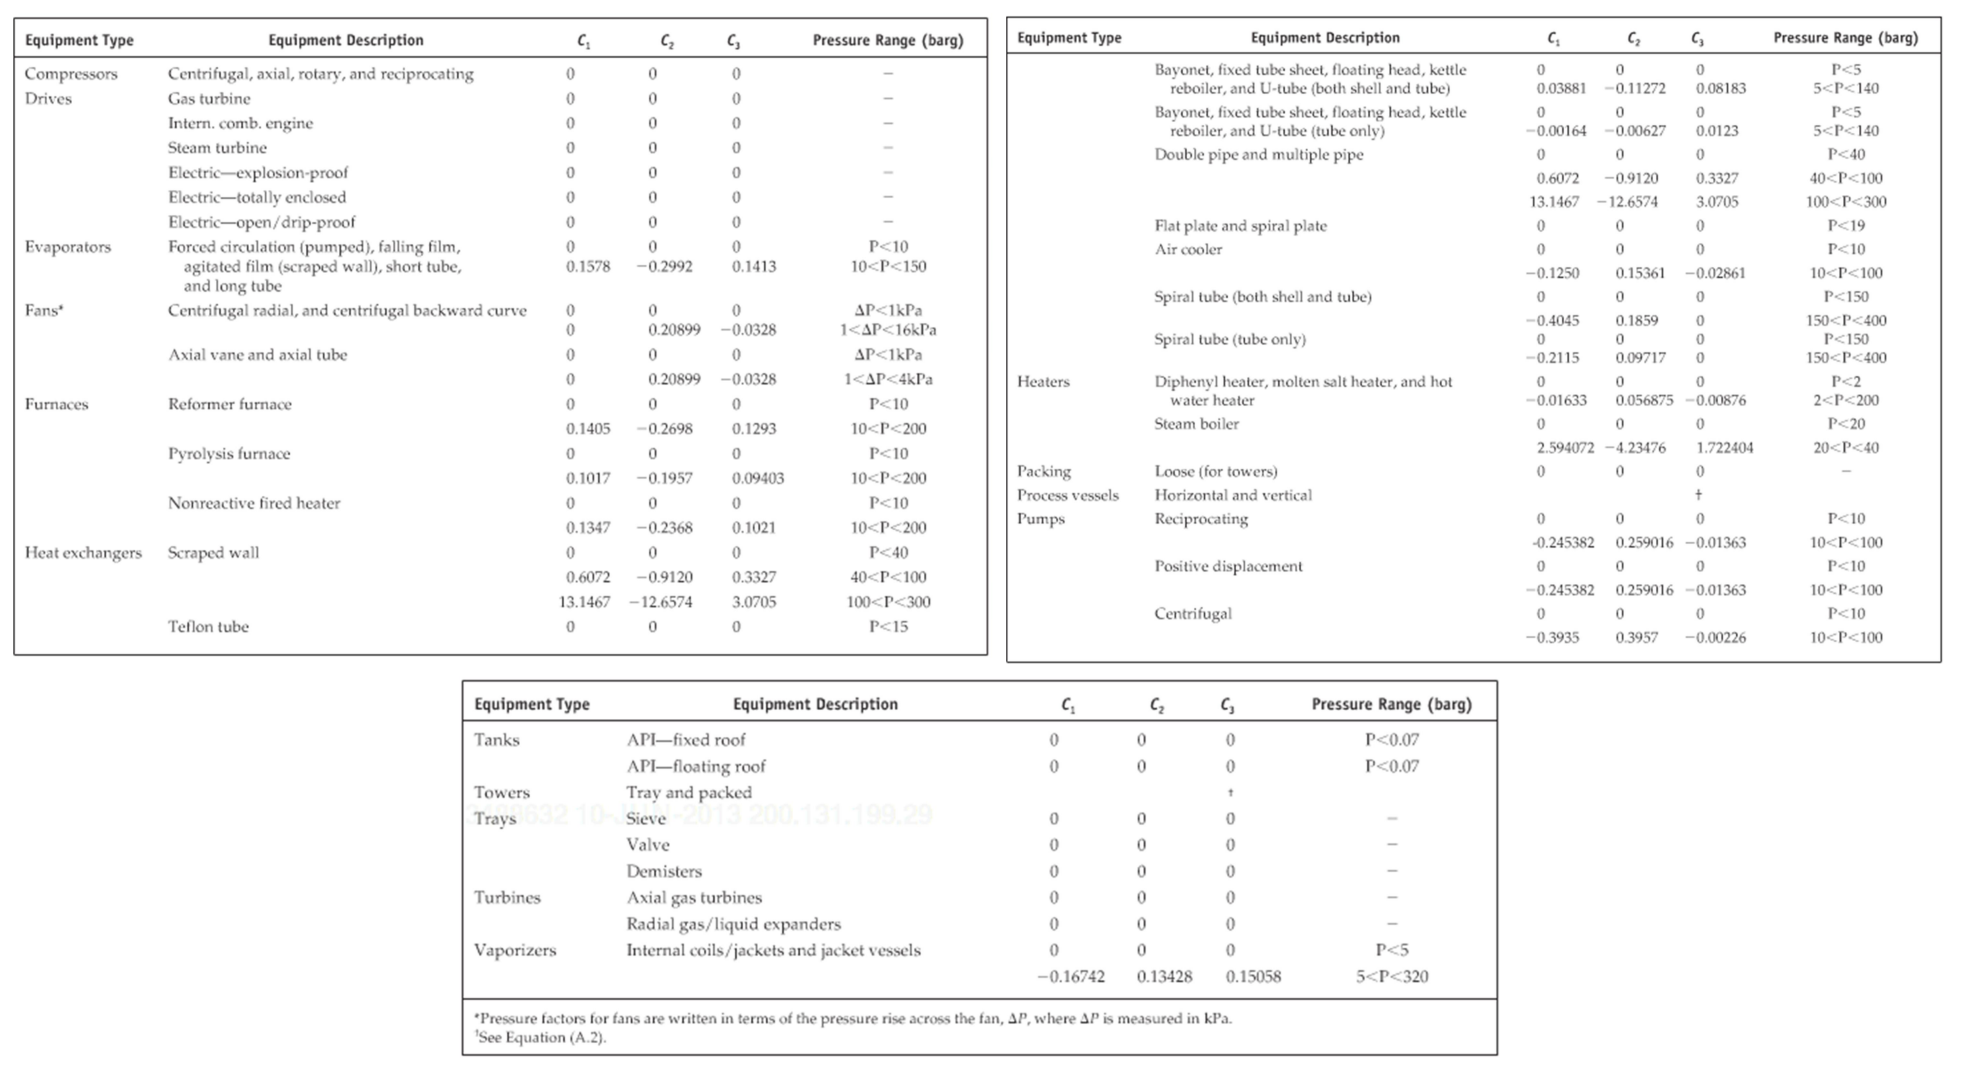

**Tabelas**: (Fator de correção de material) (parte 1)

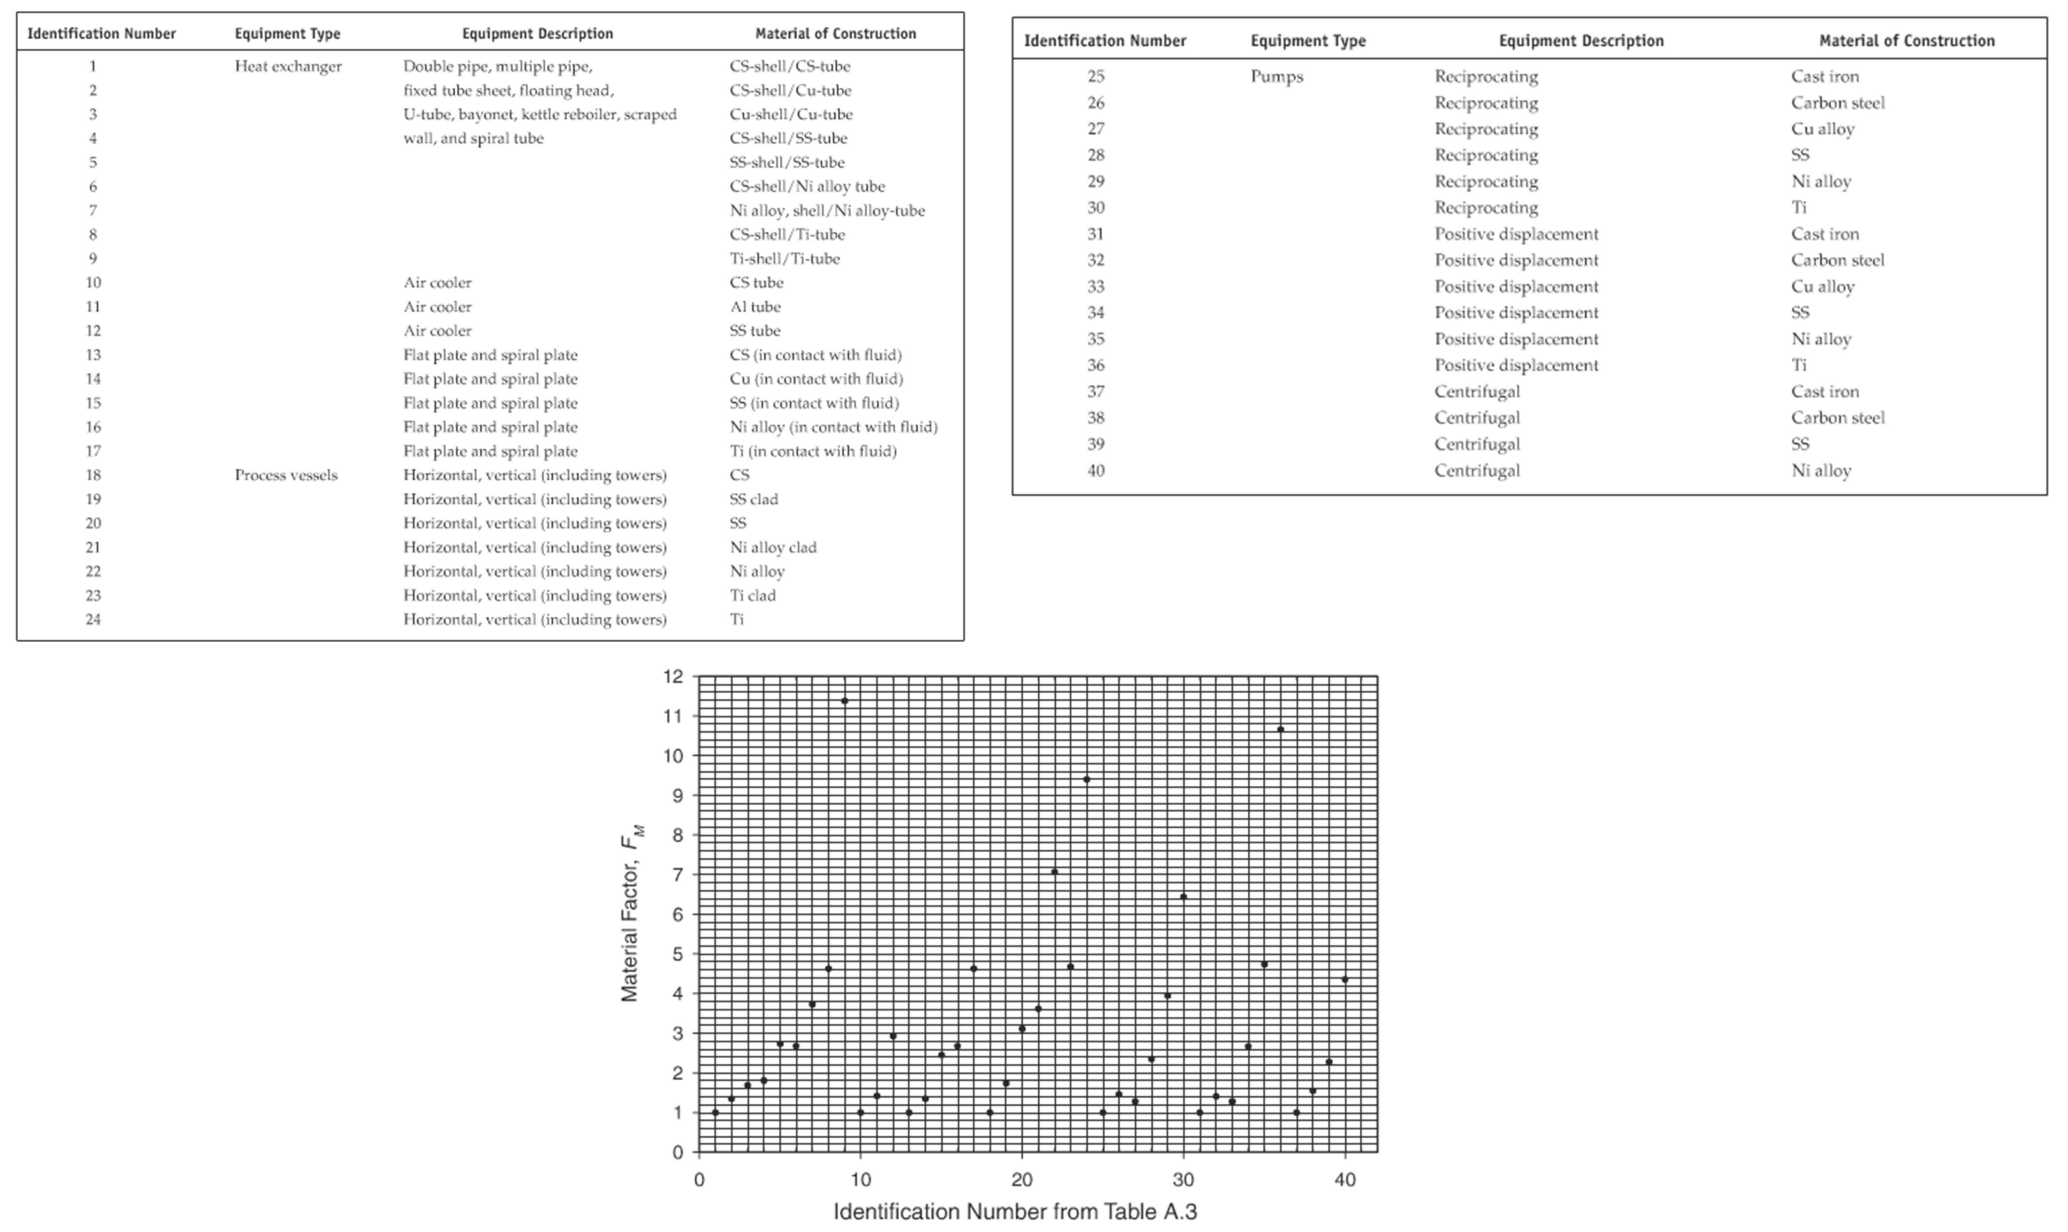

**Tabelas**: (Fator de correção de material) (parte 2)

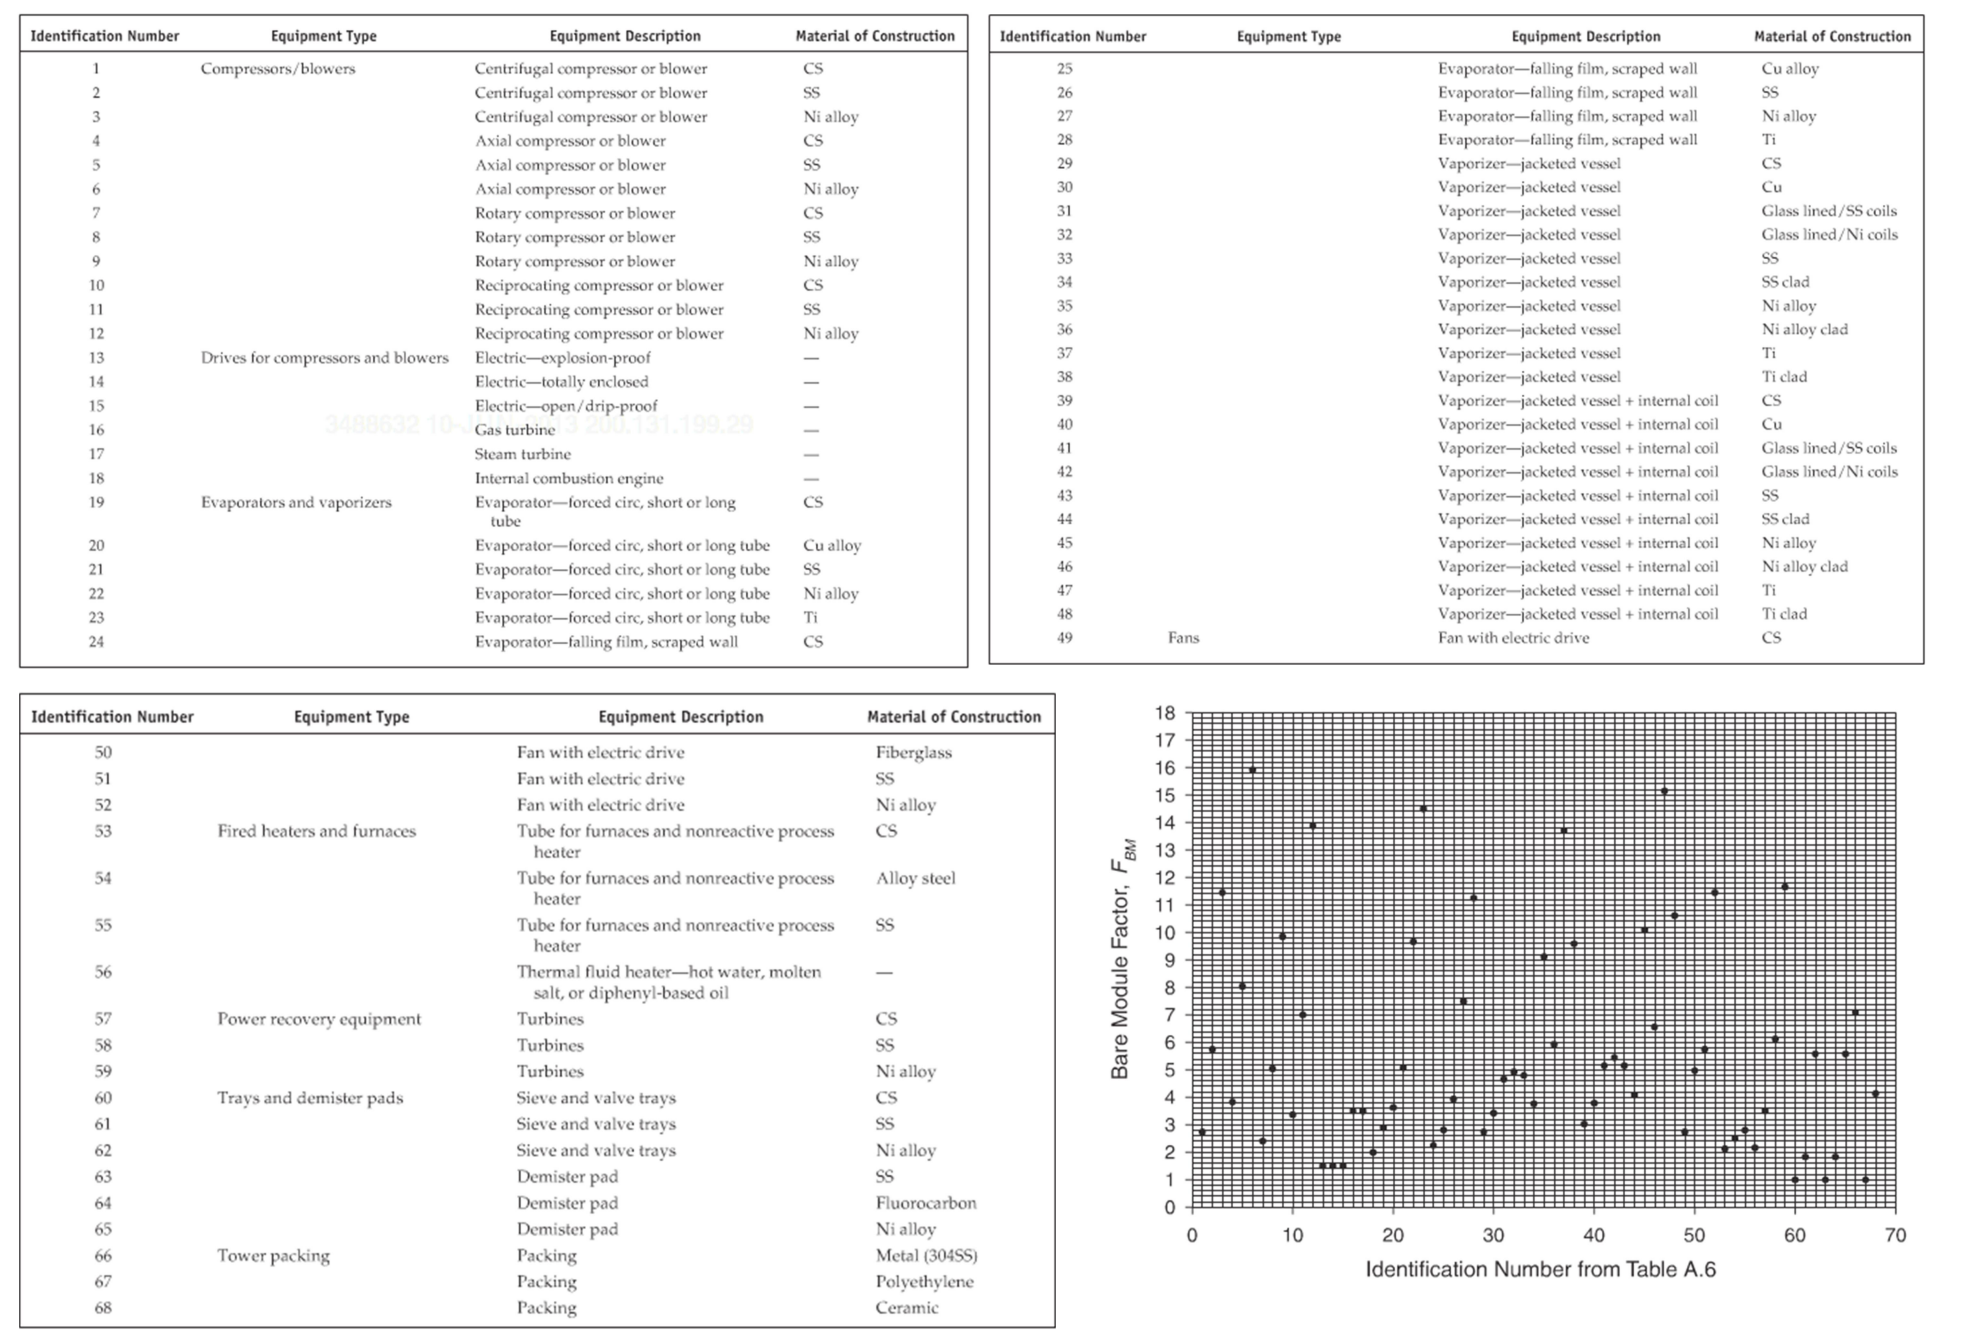

**Tabelas**: (Fator de correção de pressão)

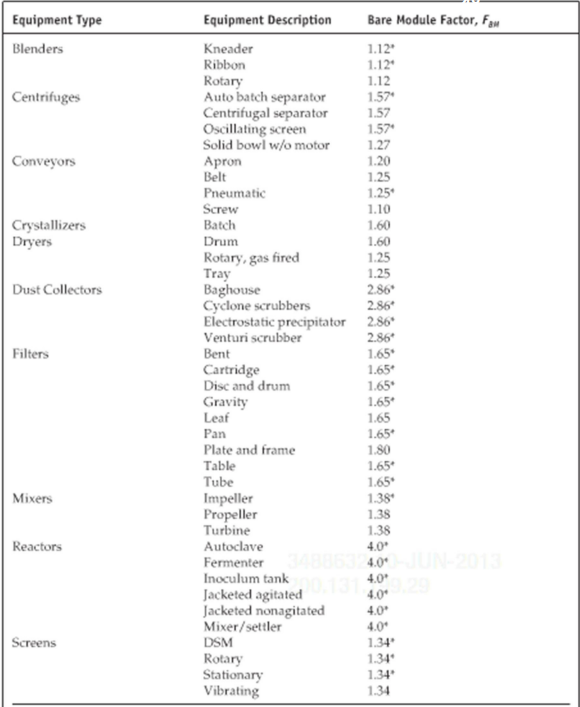

# Ajuste de Capacidade:

Supondo-se que você possui o preço de um produto ($C_1$) e ele possua um variavel principal ($A_1$) que define seu preço. Neste cenário podemos estimar o preço de um produto de 1 diferente tamanho a partir da seguinte equação: (Onde **n** é o expoente de custo associado a um intervalo)

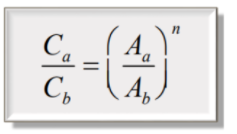

Para calcular o expoente **n** utilizamos o ajuste através:

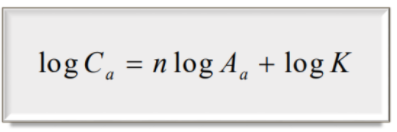

**Observação**: A regra dos Seis – Décimos consiste em supor o expoente n=0.6 e realizar o cálculo necessário.

# Ajuste de Tempo:

Também podemos ajustar o preço dos produtos através do tempo, a partir da equação: ($C_i$: custo, $I_i$: Indice tabelado do ano i)

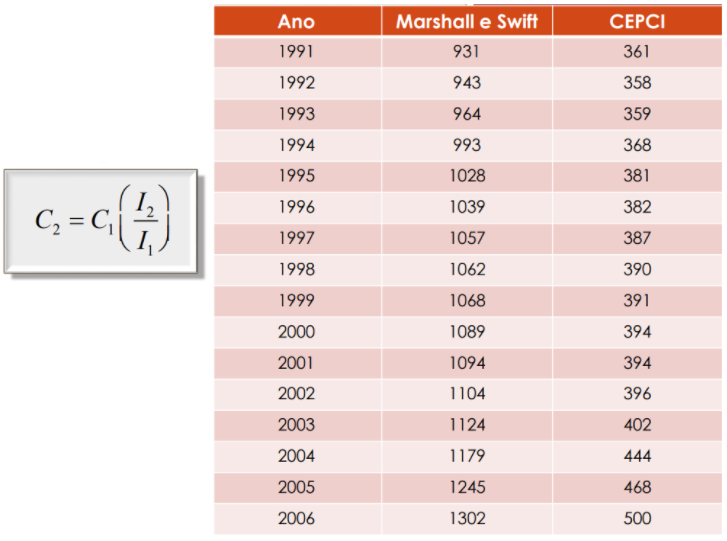

# <h1 align="center"><u> Cálculo do custo da planta:

# Custo total da planta:

O custo total de uma planta é o somatorio do module bare cost ($C_{BM}$) dos equipamentos daquela planta: ($C_{TM}$: Representa o custo total dos equipamento + custo de contingencia e taxas)

- ### $\boxed {C_{TM} = 1.18 \cdot \sum {C_{BM, i}}}$

# Custo Grass Roots:

O custo grass roots representa o custo da implantação de todos os equipamentos considerando que não há nada no lugar, do zero:

- ### $\boxed {C_{GR} = C_{TM}  + 0.5 \cdot \sum {C^0_{BM, i}}}$